## Exploratory Data Analysis


In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_excel("KAtracecovid_19.xlsx")

In [3]:
df

,Case,Date,Age,Sex,City,State,Nationality,Status,Secondary_infection,Outdate,survival_time,age_class,Sex_code
0,1,2020-03-09,41.0,M,Bangalore-Urban,Karnataka,India,alive,1,2020-03-27,18,3,1
1,2,2020-03-10,1.0,F,Bangalore-Urban,Karnataka,India,alive,0,2020-03-24,14,1,0
2,3,2020-03-10,13.0,F,Bangalore-Urban,Karnataka,India,alive,0,2020-03-27,17,1,0
3,4,2020-03-12,76.0,M,Kalburgi,Karnataka,India,dead,0,2020-03-13,1,4,1
4,5,2020-03-13,26.0,M,Bangalore-Urban,Karnataka,India,alive,0,2020-03-20,7,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26256,26257,2020-07-20,48.0,M,Chikkamagalur,Karnataka,India,alive,0,2020-07-21,1,3,1
26257,26258,2020-07-20,51.0,M,Mangalore in Dakshina Kannada District,Karnataka,India,dead,0,2020-07-20,0,3,1
26258,26259,2020-07-20,53.0,F,Bangalore-Urban,Karnataka,India,dead,0,2020-07-20,0,3,0
26259,26260,2020-07-21,68.0,F,Mysore,Karnataka,India,dead,0,2020-07-21,0,4,0


In [4]:
pd.isna(df).sum()

Case                    0
Date                    0
Age                    28
Sex                     0
City                    0
State                   0
Nationality             0
Status                  0
Secondary_infection     0
Outdate                 0
survival_time           0
age_class               0
Sex_code                0
dtype: int64

In [5]:
set(df.Sex)

{'F', 'M'}

In [6]:
df.describe()

,Case,Age,Secondary_infection,survival_time,age_class,Sex_code
count,26261.000000,26233.000000,26261.000000,26261.000000,26261.000000,26261.000000
mean,13131.000000,36.262532,0.056890,10.280302,2.752180,0.631088
std,7581.042046,16.831884,0.231638,5.286685,0.740546,0.482519
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,6566.000000,25.000000,0.000000,7.000000,3.000000,0.000000
50%,13131.000000,35.000000,0.000000,10.000000,3.000000,1.000000
75%,19696.000000,48.000000,0.000000,12.000000,3.000000,1.000000
max,26261.000000,99.000000,1.000000,53.000000,4.000000,1.000000


In [7]:
df.Age.mean()

36.26253192543743

In [8]:
df["Age"].fillna(round(df.Age.mean()),inplace = True)

In [9]:
pd.isna(df.Age).sum()

0

In [10]:
df.dtypes

Case                            int64
Date                   datetime64[ns]
Age                           float64
Sex                            object
City                           object
State                          object
Nationality                    object
Status                         object
Secondary_infection             int64
Outdate                datetime64[ns]
survival_time                   int64
age_class                       int64
Sex_code                        int64
dtype: object

In [11]:
df.Date=pd.to_datetime(df.Date)
df.Outdate=pd.to_datetime(df.Outdate)
df.dtypes

Case                            int64
Date                   datetime64[ns]
Age                           float64
Sex                            object
City                           object
State                          object
Nationality                    object
Status                         object
Secondary_infection             int64
Outdate                datetime64[ns]
survival_time                   int64
age_class                       int64
Sex_code                        int64
dtype: object

In [12]:
Sex_count = df.Sex.value_counts()
Sex_count

M    16573
F     9688
Name: Sex, dtype: int64

In [13]:
import matplotlib.pyplot as plt

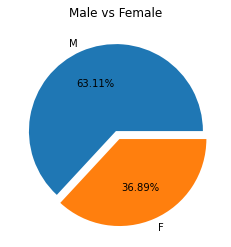

In [14]:
Gender=["M","F"]
count=[16573,9688]
plt.pie(count,labels=Gender,autopct='%1.2f%%',explode=(0,0.1))
plt.title("Male vs Female");

In [15]:
Status_count = df.Status.value_counts()
Status_count

alive    25238
dead      1023
Name: Status, dtype: int64

Text(0.5, 1.0, 'patients alive and dead')

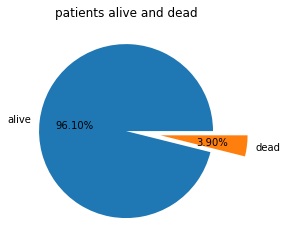

In [16]:

Status=["alive","dead"]
count1=[25238,1023]
plt.pie(count1,labels=Status,autopct='%1.2f%%',explode=(0,0.4))
plt.title("patients alive and dead")


In [17]:
pd.crosstab(df.Sex,[df.Status],margins=True)

Status,alive,dead,All
Sex,,,
F,9354,334,9688
M,15884,689,16573
All,25238,1023,26261


In [18]:
Cured_F_per=(9354/9688)*100
Cured_M_per=(15884/16573)*100
[Cured_F_per,Cured_M_per]

[96.55243600330306, 95.84263561214023]

In [19]:
pd.crosstab(df.Sex,[df.Secondary_infection],margins=True)

Secondary_infection,0,1,All
Sex,,,
F,9255,433,9688
M,15512,1061,16573
All,24767,1494,26261


In [20]:
inf_F_per=(9255/9688)*100
inf_M_per=(15512/16573)*100
[inf_F_per,inf_M_per]

[95.53055326176714, 93.5980208773306]

''

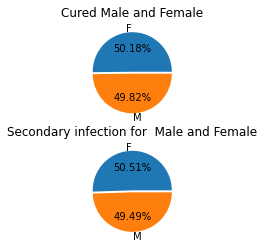

In [21]:
plt.subplot(2,1,1)
cured=["F","M"]
count2=[Cured_F_per,Cured_M_per]
plt.pie(count2,labels=cured,autopct='%1.2f%%',explode=(0,0.05))
plt.title("Cured Male and Female")

plt.subplot(2,1,2)
cured=["F","M"]
count2=[inf_F_per,inf_M_per]
plt.pie(count2,labels=cured,autopct='%1.2f%%',explode=(0,0.05))
plt.title("Secondary infection for  Male and Female")
;

#### Here we say that, Cured and secondary infection has same effect on Male and Female

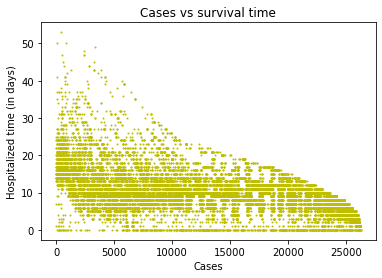

In [22]:

plt.scatter(df.index,df.survival_time,color='y',marker="o",s=1)
plt.title('Cases vs Hospitalized time')
plt.xlabel('Cases')
plt.ylabel('Hospitalized time (in days)');

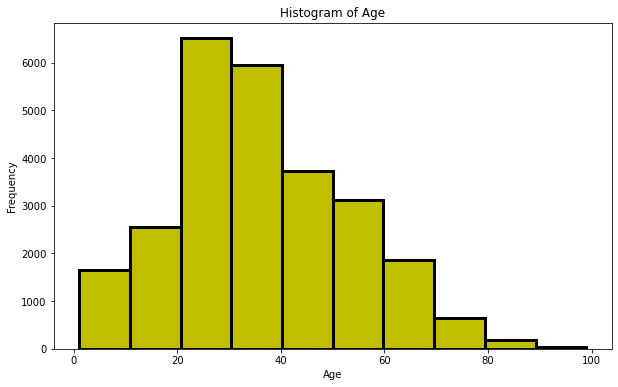

In [23]:
plt.figure(figsize=(10,6))
plt.hist(df.Age,color="y",edgecolor="k",linewidth = 3)
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency");

In [24]:
from scipy import stats
from scipy.stats import anderson

In [25]:
stats.shapiro(df.Age)

C:\Users\RUSHIKESH\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.988973081111908, pvalue=5.222218986999296e-40)

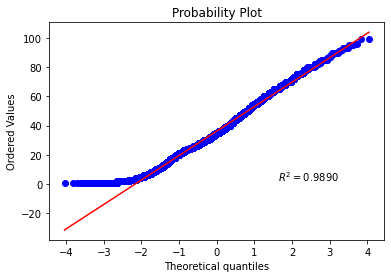

In [26]:
stats.probplot(df['Age'], dist="norm",fit=True,rvalue=True,plot=plt);

In [48]:
df1=df[df.Sex=="M"]

In [49]:
df2=df[df.Sex=="F"]

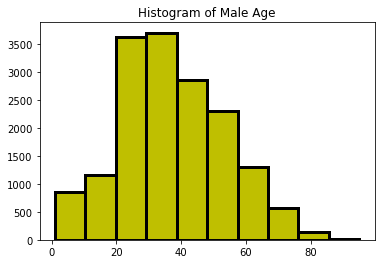

In [51]:

plt.hist(df1.Age,color="y",edgecolor="k",linewidth = 3)
plt.title("Histogram of Male Age");




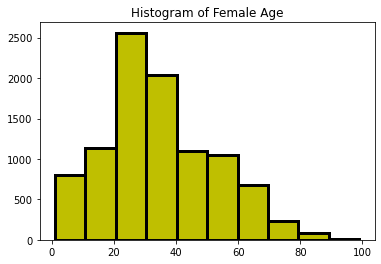

In [52]:
plt.hist(df2.Age,color="y",edgecolor="k",linewidth = 3)
plt.title("Histogram of Female Age");

In [30]:
from scipy import stats
import seaborn as sns

In [31]:
attri_count = df['Secondary_infection'].value_counts()
attri_count

0    24767
1     1494
Name: Secondary_infection, dtype: int64

In [32]:
ct = pd.crosstab(df.Secondary_infection, df.Status, margins= True)
ct

Status,alive,dead,All
Secondary_infection,,,
0,23879,888,24767
1,1359,135,1494
All,25238,1023,26261


In [33]:
No_si=(888/24767)*100
Yes_si=(135/1494)*100
[No_si,Yes_si]

[3.5854160778455197, 9.036144578313253]

In [34]:
obs = np.append(ct.iloc[0][0:2].values, ct.iloc[1][0:2].values)
obs

array([23879,   888,  1359,   135], dtype=int64)

In [35]:
row_sum = ct.iloc[0:2,2].values
exp = []
for j in range(2):
    for val in ct.iloc[2,0:2].values:
        exp.append(val*row_sum[j]/ct.loc['All','All'])
        

In [36]:
exp

[23802.198926164274, 964.801073835726, 1435.801073835726, 58.19892616427402]

In [37]:
chi_sq_stats = ((obs - exp)**2/exp).sum()
chi_sq_stats


111.81853358193185

In [38]:
dof = (len(row_sum)-1)*(len(ct.iloc[2,0:2].values)-1)
dof

1

In [39]:
1 - stats.chi2.cdf(chi_sq_stats,dof)

0.0

In [40]:
obs = np.array([ct.iloc[0][0:2].values, ct.iloc[1][0:2].values])
stats.chi2_contingency(obs)[0:3]

(110.36732280475769, 8.141615083492303e-26, 1)

#### 1 : Children(0-14 years)
#### 2 : Youth(15-24 years)
#### 3 : Adult(25-60 years)
#### 4 : Seniors(60 and over years)

<BarContainer object of 26261 artists>

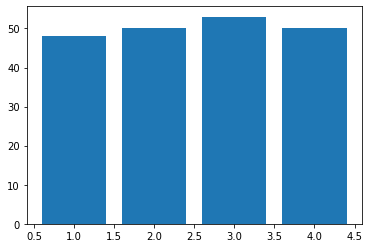

In [41]:
plt.bar(df.age_class,df.survival_time)


In [42]:
from pandas import DataFrame

In [43]:
pd.crosstab([df.Sex,df.age_class],df.Secondary_infection,margins=True)

Secondary_infection      0     1    All
Sex age_class                          
F   1                 1163    18   1181
    2                 1569    67   1636
    3                 5764   294   6058
    4                  759    54    813
M   1                 1274    24   1298
    2                 2084   104   2188
    3                10809   817  11626
    4                 1345   116   1461
All                  24767  1494  26261

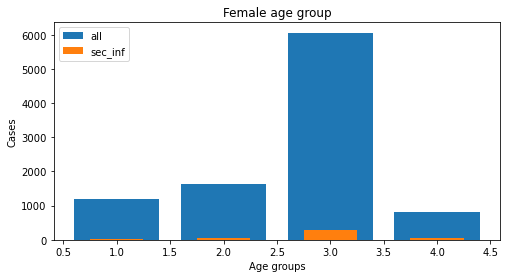

In [53]:
plt.figure(figsize=(8,4,))
age_catg=[1,2,3,4]
Fall=[1181,1636,6058,813]
Fsec_inf=[18,67,294,54]
plt.title("Female age group")
plt.bar(age_catg,Fall,label="all")
plt.bar(age_catg,Fsec_inf,width=0.5,label="sec_inf")
plt.xlabel("Age groups")
plt.ylabel("Cases")
plt.legend(loc = 2);



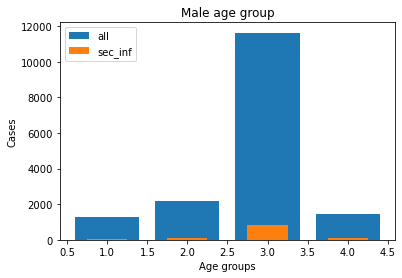

In [54]:

Mall=[1298,2188,11626,1461]
Msec_inf=[24,104,817,116]
plt.title("Male age group")
plt.bar(age_catg,Mall,label="all")
plt.bar(age_catg,Msec_inf,width=0.5,label="sec_inf")
plt.xlabel("Age groups")
plt.ylabel("Cases")
plt.legend(loc = 2);

